<a href="https://colab.research.google.com/github/mvgmarian/matematicas-ml/blob/master/notebooks/4-calculus-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo II: Derivadas parciales e integrales

Esta clase, *Cálculo II: Derivadas Parciales e Integrales*, se basa en el cálculo de derivadas de una sola variable para introducir los gradientes y el cálculo integral. Los gradientes de aprendizaje, facilitados por el cálculo de derivadas parciales, son la base del entrenamiento con datos de la mayoría de los algoritmos de aprendizaje automático, es decir, el descenso de gradiente estocástico (SGD). Combinado con el principio de la regla de la cadena (también tratado en esta clase), el SGD permite al algoritmo de retropropagación entrenar redes neuronales profundas.

El cálculo integral, por su parte, resulta útil para innumerables tareas relacionadas con el aprendizaje automático, como encontrar el área bajo la denominada «curva ROC», una métrica predominante para evaluar modelos de clasificación. El contenido de esta clase es fundamental para otras clases de la serie *Fundamentos del aprendizaje automático*, especialmente *Probabilidad y teoría de la información* y *Optimización*.

En el transcurso del estudio de este tema, usted:

* Desarrollar una comprensión de lo que está pasando bajo el capó de los algoritmos de aprendizaje automático, incluidos los utilizados para el aprendizaje profundo.
* Ser capaz de comprender los detalles de la derivada parcial, cálculo multivariante que es común en los documentos de aprendizaje automático, así como muchos en otros temas que subyacen ML, incluyendo la teoría de la información y algoritmos de optimización.
* Utilizar el cálculo integral para determinar el área bajo cualquier curva dada, una tarea recurrente en ML aplicada, por ejemplo, para evaluar el rendimiento del modelo mediante el cálculo de la métrica ROC AUC.

**Tenga en cuenta que este cuaderno Jupyter no está diseñado para funcionar por sí solo. Es el código que acompaña a una clase o a los vídeos de la serie [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) de Jon Krohn, que ofrecen detalles sobre lo siguiente:**

*Segmento 1: Repaso de Cálculo Introductorio*.

* El método Delta
* Diferenciación con reglas
* AutoDiff: Diferenciación Automática


*Segmento 2: Gradientes de Aprendizaje Automático*

* Derivadas Parciales de Funciones Multivariantes
* La regla de la cadena de derivadas parciales
* Coste Cuadrático
* Gradientes
* Gradient Descent
* Backpropagation
* Derivadas parciales de orden superior


*Segmento 3: Integrales*

* Clasificación binaria
* La matriz de confusión
* La curva ROC (Receiver-Operating Characteristic)
* Cálculo manual de integrales
* Integración numérica con Python
* Hallar el área bajo la curva ROC
* Recursos para profundizar en el cálculo

## Segmento 1: Repaso de Cálculo Introductorio

Revisar el notebook de [*Regresión en Pytorch* ](https://github.com/joanby/matematicas-ml/blob/master/notebooks/regression-in-pytorch.ipynb).

## Segmento 2: Gradientes aplicados al Machine Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # para la constante PI

### Derivadas parciales de funciones multivariantes

Definimos la función $f(x, y)$ para $z = x^2 - y^2$:

In [2]:
def f(my_x, my_y):
    return my_x**2 - my_y**2

Traza $z$ con respecto a $x$ variando $x$...

In [3]:
xs = np.linspace(-3, 3, 1000)

...mientras mantenemos $y$ constante (por ejemplo en $y = 0$):

In [4]:
zs_wrt_x = f(xs, 0)

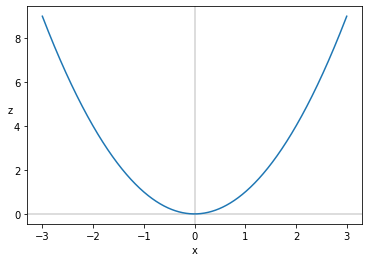

In [ ]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Para determinar la pendiente de $z$ respecto a $x$ en un punto dado de la curva, podemos utilizar la derivada parcial de las diapositivas: $$ \frac{\partial z}{\partial x} = 2x$$

In [5]:
def delz_delx(my_x, my_y): # y no es relevante para *esta* derivada parcial; a menudo lo será
    return 2*my_x

In [6]:
x_samples = [-2, -1, 0, 1, 2]

In [9]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [7]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):

    my_z = my_f(my_x, my_y) # z = f(x, y)
    plt.scatter(my_x, my_z, c=col, zorder=3)

    tangent_m = fprime(my_x, my_y) # La pendiente es la derivada parcial de f(x, y) con respecto a x
    tangent_b = my_z - tangent_m*my_x # La recta es z=mx+b, por tanto b=z-mx
    tangent_line = tangent_m*my_xs + tangent_b

    plt.plot(my_xs, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3)

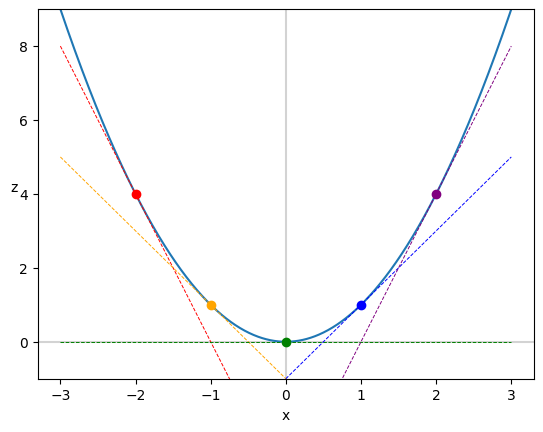

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Demostrando así visualmente $\frac{\partial z}{\partial x} = 2x$.

Es decir, la pendiente de $z$ a lo largo del eje $x$ es *dos veces* el valor de $x$.

**Volver a las slides.**

Ahora vamos a representar $z$ con respecto a $y$ variando $y$...

In [13]:
ys = np.linspace(-3, 3, 1000)

...mientras mantenemos $x$ constantw (es decir, por ejemplo $x$ = 0):

In [14]:
zs_wrt_y = f(0, ys)

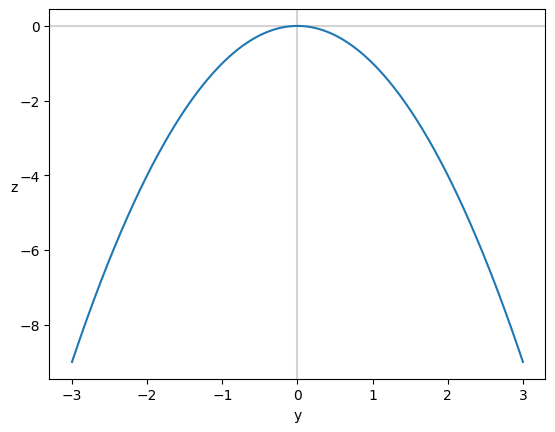

In [15]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

Como en las diapositivas, la derivada parcial de $z$ respecto a $y$ resulta ser independiente de $x$ (igual que antes observamos que $x$ es independiente de $y$), por lo que mientras $z$ varía en función tanto de $x$ como de $y$, la pendiente de $z$ respecto a $y$ es la misma sea cual sea $x$: $$ \frac{\partial z}{\partial y} = -2y $$

Así, por ejemplo, mantener $x$ constante en 2 en lugar de 0 aumenta $z$, pero no tiene ningún impacto en la pendiente de $z$ respecto a $y$:

In [16]:
zs_wrt_y = f(2, ys)

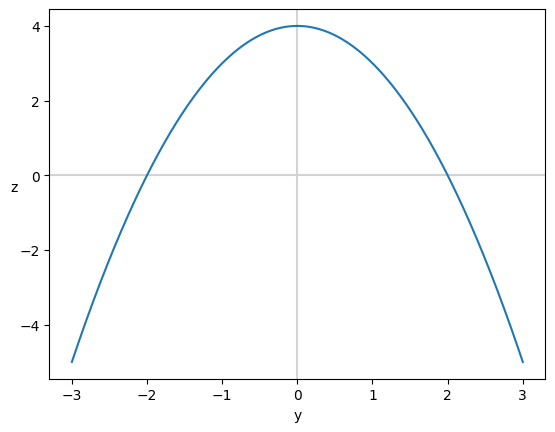

In [17]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [18]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [19]:
y_samples = [-2, -1, 0, 1, 2]

In [20]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # cambiamos my_xs por my_ys

    my_z = my_f(my_x, my_y)
    plt.scatter(my_y, my_z, c=col, zorder=3) # cambiamos my_x por my_y

    tangent_m = fprime(my_x, my_y)
    tangent_b = my_z - tangent_m*my_y # cambiamos my_x por my_y
    tangent_line = tangent_m*my_ys + tangent_b # cambiamos my_xs por my_ys

    plt.plot(my_ys, tangent_line, c=col,
             linestyle='dashed', linewidth=0.7, zorder=3) # cambiamos my_xs por my_ys

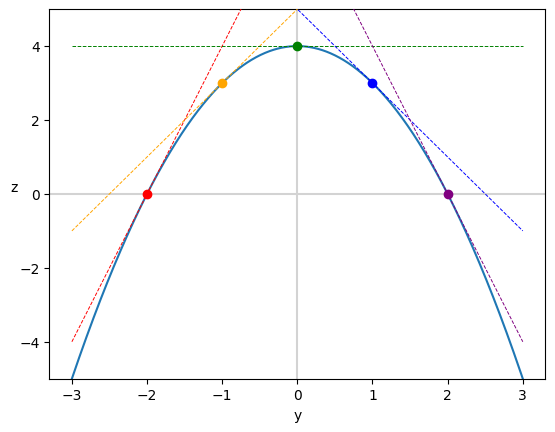

In [21]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Demostrando así visualmente $\frac{\partial z}{\partial y} = -2y$.

Es decir, la pendiente de $z$ a lo largo del eje $y$ es *el doble* del valor de $y$ *e invertida*, lo que da lugar a que la curva parabólica se abra hacia abajo.

**Ejercicios**: Usa lápiz y papel para determinar:

* El valor de $z$,
* La pendiente de $z$ con respecto a $x$,
* Y la pendiente de $z$ con respecto a $y$

...en los puntos donde:

1. $x = 3, y = 0$
2. $x = 2, y = 3$
3. $x = -2, y = -3$

Determinar derivadas parciales a mano utilizando reglas es útil para entender cómo funciona el cálculo. En la práctica, sin embargo, la autodiferenciación nos permite hacerlo más fácilmente (sobre todo si hay un gran número de variables). Por ejemplo, utilicemos la biblioteca de diferenciación automática PyTorch para calcular la pendiente de $z$ con respecto a $x$ e $y$ en un punto cualquiera $(x, y, z)$:

In [22]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [23]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [24]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [25]:
z.backward() # Autodiff

Como ya sabíamos por nuestros ejercicios anteriores, la pendiente del punto (0, 0, 0) es cero con respecto a los ejes $x$ e $y$:

In [26]:
x.grad

tensor(0.)

In [27]:
y.grad

tensor(-0.)

**Ejercicio**: Repite los ejercicios más recientes de lápiz y papel usando PyTorch (o TensorFlow, si lo prefieres).

In [36]:
#x=2, y=3
x = torch.tensor(2.).requires_grad_()
y = torch.tensor(3.).requires_grad_()
z = f(x, y)
z.backward()
x.grad

tensor(4.)

In [37]:
y.grad

tensor(-6.)

**Volver a las slides aquí.**

### Derivadas parciales del volumen de un cilindro

El volumen de un cilindro se describe por $v = \pi r^2 l$ donde:

* $r$ es el radio del cilindro
* $l$ es su altura

In [28]:
def cylinder_vol(my_r, my_l):
    return math.pi * my_r**2 * my_l

In [29]:
# Si por ejemplo el radio es de 3 metros...
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [30]:
# ...y la altura es de 5 metros:
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [31]:
# Entonces el volumen sería de 141.4 metros cúbicos:
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [32]:
v.backward()

In [33]:
l.grad

tensor(28.2743)

Y como hemos visto en las transparencias: $$\frac{\partial v}{\partial l} = \pi r^2$$

In [ ]:
math.pi * 3**2

28.274333882308138

Esto significa que con $r = 3$, un cambio en $l$ de una unidad corresponde a un cambio en $v$ de 28,27$\text{m}^3$. Podemos demostrarlo nosotros mismos:

In [ ]:
cylinder_vol(3, 6)

169.64600329384882

In [ ]:
cylinder_vol(3, 6) - cylinder_vol(3, 5)

28.274333882308127

In [ ]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

**Volver a las slides aquí.**

Para cambios en $v$ con respecto a $r$ tenemos lo siguiente de las diapositivas: $$\frac{\parcial v}{\parcial r} = 2 \pi r l$$

In [38]:
r.grad

tensor(94.2478)

In [39]:
2 * math.pi * 3 * 5

94.24777960769379

$r$ está incluida en la derivada parcial por lo que su ajuste afecta a la escala de su impacto sobre $v$. Aunque es nuestro primer ejemplo en este cuaderno, es típico en cálculo que la derivada sólo se aplique a un $\Delta r$ infinitesimalmente pequeño. Cuanto más pequeño sea $\Delta r$, más se acercará a la verdadera $\frac{\partial v}{\partial r}$. Por ejemplo, en $\Delta r = 1 \times 10^{-6}$:

In [ ]:
delta = 1e-6

In [ ]:
(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5)) / delta # Dividiendo por delta, restaura la escala

94.24779531741478

**Volver a las slides aquí.**

### Gradientes del Coste con respecto a los Parámetros del Modelo

Ver los notebooks independientes:

* [Gradiente de regresión de un punto](https://github.com/joanby/matematicas-ml/blob/master/notebooks/single-point-regression-gradient.ipynb)
* [Gradiente de regresión por lotes](https://github.com/joanby/matematicas-ml/blob/master/notebooks/batch-regression-gradient.ipynb)

## Segmento 3: Integrales

In [ ]:
from scipy.integrate import quad # "cuadratura" = integración numérica (opuesta a la simbólica)

De las slides: $$ \int_1^2 \frac{x}{2} dx = \frac{3}{4} $$

In [ ]:
def g(x):
    return x/2

In [ ]:
quad(g, 1, 2)

(0.75, 8.326672684688674e-15)

La segunda salida de `quad` es una estimación del error absoluto de la integral, que en este caso es esencialmente cero.

**Volver a las slides aquí.**

In [ ]:
def h(x):
    return 2*x

In [ ]:
quad(h, 3, 4)

(7.0, 7.771561172376096e-14)

**Volver a las slides aquí.**

### Área bajo la curva ROC

Cuando no tenemos una función pero sí tenemos coordenadas $(x, y)$, podemos utilizar el método `auc()` de la librería scikit-learn, que utiliza una aproximación numérica (la [regla trapezoidal](https://en.wikipedia.org/wiki/Trapezoidal_rule)) para encontrar el área bajo la curva descrita por las coordenadas:

In [ ]:
from sklearn.metrics import auc

A partir de las diapositivas, las coordenadas $(x, y)$ de nuestra curva ROC de detección de perritos calientes son:

* (0, 0)
* (0, 0.5)
* (0.5, 0.5)
* (0.5, 1)
* (1, 1)

In [ ]:
xs = [0, 0,   0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1,   1]

In [ ]:
auc(xs, ys)

0.75